# Error Backpropagation

The required steps for backpropgation algorithm are:
1. Forward propagate an input $x_n$
2. Evaluate $\forall k. \delta_k^{L}$ at the output layer $L$
3. Backpropagate $\forall l\neq L, k. \delta_k^{l}$
4. Evaluate $\forall i,j. \frac{\partial E_n}{w_{i,j}}$

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from numpy.random import randn, seed

In [2]:
%config InlineBackend.figure_format = "retina"

We will consider the example in section 5.3.2 of prml:
![Figure 5.1](./imgs/f51.png)

A two-layered neural network with sum of squares error as the error function; with linear output activation units, i.e., $y_k = a_k$ and; tanh (hyperbolic tangent) activation functions.

In [3]:
url = "https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Gauss2.dat"
beacon = "Data:"
r = requests.get(url)
data = r.text
data = data[data.rfind(beacon) + len(beacon):]
data = np.array([v.split() for v in data.split("\n")][1:-1]).astype("float")

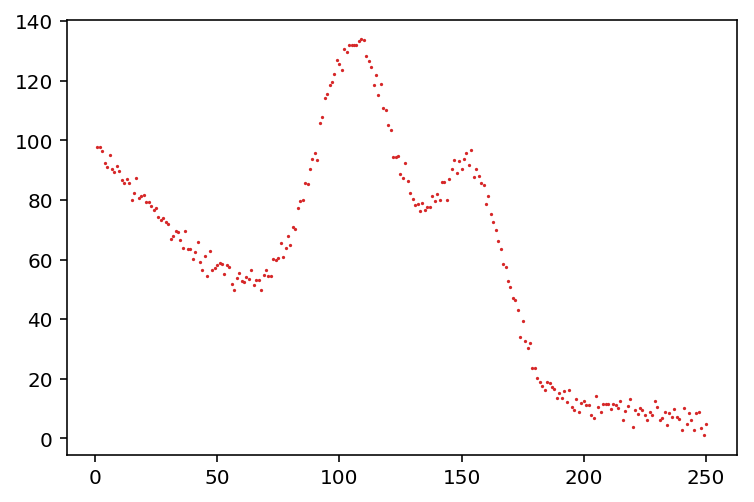

In [4]:
plt.scatter(data[:, 1], data[:,0], s=0.4, c="tab:red")

Suppose we have a two-layered neural network with $H$ hidden units; an input unit and a single output unit. The explicit form for this neural network is of the form:

$$
    f(x_n, {\bf w}^{1}, {\bf w}^{2}) = \sum_{k=1}^H w_{1k}^{(2)} h\left(w_{k1}^{(1}x_n + w_{k0}^{(1)}\right) + w_{10}^{(2)}
$$

Suppose further that this neural network has a tanh activation function.

In [112]:
seed(314)
w0 = randn(4, 2)
w1 = randn(1, 5)

In [113]:
xn = np.array([[3.5, 1]]).T

In [114]:
z1 = np.r_[[[1]], np.tanh(w0 @ xn)]
z1

array([[ 1.        ],
       [ 0.87714783],
       [ 0.97912492],
       [-0.98281573],
       [-0.3752677 ]])

In [115]:
y = w1 @ z1

In [116]:
def forward_prop(x, w1, w2):
    a1 = w1 @ x
    z1 = np.r_[[[1]], np.tanh(a1)]
    a2 = w2 @ z1
    return a1, a2

In [117]:
forward_prop(xn, w0, w1)

(array([[ 1.36326352],
        [ 2.27592687],
        [-2.37413929],
        [-0.39454023]]), array([[0.81199909]]))

In [118]:
# delta 1's
(1 - np.tanh(xn) ** 2)

array([[0.00364088],
       [0.41997434]])

In [119]:
x, t  = data[0]
x = np.array([[x, 1]]).T
a1, a2 = forward_prop(x, w0, w1)

d2 = a2.ravel()[0] - t

In [126]:
((1 - np.tanh(a1) ** 2) * d2).shape

(4, 1)

In [127]:
w1.shape

(1, 5)

In [79]:
d1 = 

-1.0044959647533538

In [104]:
a1

array([[-175.92076461],
       [ -21.01146624],
       [-131.19686692],
       [ 103.03221057]])